# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>


# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [1]:
# making an API call
from requests import get

response = get('https://pokeapi.co/api/v2/pokemon/psyduck/')

# print(response.status_code)

print(response.headers['Content-Type'])

if response.ok:
    current_poke_data = response.json()
else:
    print(f'Bad request {response.status_code}, please choose valid pokemon')

application/json; charset=utf-8


### Display a Pokemon's name, weight, abilities, and types

In [28]:
# get the name
current_poke_data['name'] 

'psyduck'

In [29]:
# get types
current_poke_data['types']

[{'slot': 1,
  'type': {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'}}]

In [31]:
# get weight
current_poke_data['weight']

196

In [32]:
# get abilities
current_poke_data['abilities']

[{'ability': {'name': 'damp', 'url': 'https://pokeapi.co/api/v2/ability/6/'},
  'is_hidden': False,
  'slot': 1},
 {'ability': {'name': 'cloud-nine',
   'url': 'https://pokeapi.co/api/v2/ability/13/'},
  'is_hidden': False,
  'slot': 2},
 {'ability': {'name': 'swift-swim',
   'url': 'https://pokeapi.co/api/v2/ability/33/'},
  'is_hidden': True,
  'slot': 3}]

In [ ]:
# Create a structure for a single pokemon


In [34]:
psyduck = {
    'name': current_poke_data['name'],
    'types' : current_poke_data['types'],
    'weight' : current_poke_data['weight'],
    'abilities' : current_poke_data['abilities']
}

print(psyduck)

{'name': 'psyduck', 'types': [{'slot': 1, 'type': {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'}}], 'weight': 196, 'abilities': [{'ability': {'name': 'damp', 'url': 'https://pokeapi.co/api/v2/ability/6/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'cloud-nine', 'url': 'https://pokeapi.co/api/v2/ability/13/'}, 'is_hidden': False, 'slot': 2}, {'ability': {'name': 'swift-swim', 'url': 'https://pokeapi.co/api/v2/ability/33/'}, 'is_hidden': True, 'slot': 3}]}


#### Create a function to Pull in your own Pokemon's data

In [15]:
def poke_api_call(pokemon):
    res = get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}')
    if res.ok:
        data = res.json()
        pokemon_dict = {
            'name': data['name'],
            'types' : data['types'],
            'weight' : data['weight'],
            'abilities' : data['abilities']
        }
    else:
        print(f'Invalid Request, status code {res.status_code}, Please enter valid pokemon')
        return {'message' :f'Invalid Request, status code {res.status_code}, Please enter valid pokemon'}
    return pokemon_dict

poke_api_call('pikachu')

{'name': 'pikachu',
 'types': [{'slot': 1,
   'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}],
 'weight': 60,
 'abilities': [{'ability': {'name': 'static',
    'url': 'https://pokeapi.co/api/v2/ability/9/'},
   'is_hidden': False,
   'slot': 1},
  {'ability': {'name': 'lightning-rod',
    'url': 'https://pokeapi.co/api/v2/ability/31/'},
   'is_hidden': True,
   'slot': 3}]}

Choose your pokemon

In [18]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']


random_six_pokemon = {i: poke_api_call(i) for i in random_team}

for k,v in random_six_pokemon.items():
    print(f'{k}: {v}')

598: {'name': 'ferrothorn', 'types': [{'slot': 1, 'type': {'name': 'grass', 'url': 'https://pokeapi.co/api/v2/type/12/'}}, {'slot': 2, 'type': {'name': 'steel', 'url': 'https://pokeapi.co/api/v2/type/9/'}}], 'weight': 1100, 'abilities': [{'ability': {'name': 'iron-barbs', 'url': 'https://pokeapi.co/api/v2/ability/160/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'anticipation', 'url': 'https://pokeapi.co/api/v2/ability/107/'}, 'is_hidden': True, 'slot': 3}]}
282: {'name': 'gardevoir', 'types': [{'slot': 1, 'type': {'name': 'psychic', 'url': 'https://pokeapi.co/api/v2/type/14/'}}, {'slot': 2, 'type': {'name': 'fairy', 'url': 'https://pokeapi.co/api/v2/type/18/'}}], 'weight': 484, 'abilities': [{'ability': {'name': 'synchronize', 'url': 'https://pokeapi.co/api/v2/ability/28/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'trace', 'url': 'https://pokeapi.co/api/v2/ability/36/'}, 'is_hidden': False, 'slot': 2}, {'ability': {'name': 'telepathy', 'url': 'https://pokeapi.c

#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [16]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.

my_six_pokemon = {}

for pokemon in your_team:
    my_six_pokemon[pokemon] = poke_api_call(pokemon)
    
for k,v in my_six_pokemon.items():
    print(f'{k}: {v}')

[233, 872, 100, 678, 39, 506]
electabuzz: {'name': 'electabuzz', 'types': [{'slot': 1, 'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}], 'weight': 300, 'abilities': [{'ability': {'name': 'static', 'url': 'https://pokeapi.co/api/v2/ability/9/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'vital-spirit', 'url': 'https://pokeapi.co/api/v2/ability/72/'}, 'is_hidden': True, 'slot': 3}]}
haunter: {'name': 'haunter', 'types': [{'slot': 1, 'type': {'name': 'ghost', 'url': 'https://pokeapi.co/api/v2/type/8/'}}, {'slot': 2, 'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}], 'weight': 1, 'abilities': [{'ability': {'name': 'levitate', 'url': 'https://pokeapi.co/api/v2/ability/26/'}, 'is_hidden': False, 'slot': 1}]}
tyranitar: {'name': 'tyranitar', 'types': [{'slot': 1, 'type': {'name': 'rock', 'url': 'https://pokeapi.co/api/v2/type/6/'}}, {'slot': 2, 'type': {'name': 'dark', 'url': 'https://pokeapi.co/api/v2/type/17/'}}], 'weight': 2020, 

## Lets create a class called 'Pokemon' and create our pokemon as instances

pikachu
<Pokemon: pikachu>
['static', 'lightning-rod']
['electric']


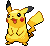

In [75]:
class Pokemon():
    
    def __init__(self, pokemon):
        self.name = pokemon
        self.weight = None
        self.abilities = []
        self.types = []
        self.sprite = None
        self.poke_api_call()
        
    def __repr__(self):
        return f'<Pokemon: {self.name}>'
    
    def poke_api_call(self):
        while True:
            res = get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
            if res.ok:
                data = res.json()
                self.name = data['name']
                self.weight = data['weight']
                self.abilities = [ability['ability']['name'] for ability in data['abilities']]
                self.types = [poke_type['type']['name'] for poke_type in data['types']]
                self.sprite = self.get_sprite(data)
                break
            else:
                print(f'Invalid Request, status code {res.status_code}, Please enter valid pokemon')
                self.update_pokemon()
            
    def update_pokemon(self):
        self.name = input('Pokemon name: ')
        
    def get_sprite(self, data):
        animated = data['sprites']['versions']['generation-v']['black-white']['animated']['front_default']
        return animated if animated else data['sprites']['front_default']
    
    def display_img(self):
        display(Image(self.sprite, width = 75))
        
    def display_info(self):
        print(f'{self.name} Weight: {self.weight}')
        print('Types: ')
        for poke_type in self.types:
            print(poke_type)
        print('Abilities: ')
        for ability in self.abilities:
            print(ability)
        self.display_img()
        
psyduck = Pokemon('pikachu')

# psyduck.poke_api_call()
print(psyduck)
print(psyduck.abilities)
print(psyduck.types)
psyduck.display_img()



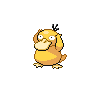

In [41]:
from IPython.display import Image

display(Image(psyduck.sprite, width = 100))

In [76]:
test = Pokemon('tst')

tst
Invalid Request, status code 404, Please enter valid pokemon
Pokemon name: test
test
Invalid Request, status code 404, Please enter valid pokemon
Pokemon name: psyduck
psyduck


### Let's Catch some Pokemon

What Pokemon are you catching?: test
test
Invalid Request, status code 404, Please enter valid pokemon
Pokemon name: psyduck
psyduck
What Pokemon are you catching?: tst
tst
Invalid Request, status code 404, Please enter valid pokemon
Pokemon name: pikachu
pikachu
What Pokemon are you catching?: hitmonlee
hitmonlee
What Pokemon are you catching?: snorlax
snorlax
What Pokemon are you catching?: charmander
charmander
What Pokemon are you catching?: mew
mew
dsmith's Team
test: <Pokemon: psyduck>
psyduck Weight: 196
Types: 
water
Abilities: 
damp
cloud-nine
swift-swim


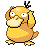

tst: <Pokemon: pikachu>
pikachu Weight: 60
Types: 
electric
Abilities: 
static
lightning-rod


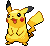

hitmonlee: <Pokemon: hitmonlee>
hitmonlee Weight: 498
Types: 
fighting
Abilities: 
limber
reckless
unburden


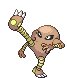

snorlax: <Pokemon: snorlax>
snorlax Weight: 4600
Types: 
normal
Abilities: 
immunity
thick-fat
gluttony


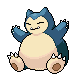

charmander: <Pokemon: charmander>
charmander Weight: 85
Types: 
fire
Abilities: 
blaze
solar-power


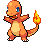

mew: <Pokemon: mew>
mew Weight: 40
Types: 
psychic
Abilities: 
synchronize


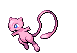

In [77]:
pokedex = {}

class Pokedex:
    
    def __init__(self, username):
        self.username = username
        self.collection = {}
        
    def __repr__(self):
        return f'<Pokedex: {self.username}>'
        
    def add_pokemon(self):
        pokemon = input("What Pokemon are you catching?: ")
        pokemon = Pokemon(pokemon)
        self.collection[pokemon.name] = pokemon
        
    def build_team(self):
        while len(self.collection) < 6:
            self.add_pokemon()
            
    def remove_pokemon(self):
        pokemon_to_remove = input('What Pokemon are you releasing?: ')
        if pokemon_to_remove in self.collection:
            self.collection.pop(pokemon_to_remove)
        else:
            print('Pokemon not in collection')
            
    def display_team(self):
        print(f'{self.username}\'s Team')
        for pokemon, instance in self.collection.items():
            print(f'{pokemon}: {instance}')
            instance.display_info()
            
pokedex = Pokedex('dsmith')

# pokedex.add_pokemon()
# print(pokedex.collection, 'before remove')
# pokedex.remove_pokemon()
# pokedex.collection

pokedex.build_team()
pokedex.display_team()

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [ ]:
# Display an image in Jupyter notebook
from IPython.display import Image

# display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))


In [ ]:
# recreate your pokemon class here
class Pokemon:
    pass

In [ ]:
# Calling our new method


## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

Now let's evolve a few

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [ ]:
class Move_Tutor:
    def __init__(self):
        self.move_list = []

In [ ]:
pikachu.teach_move()


What move would you like to teach pikachu? spark
pikachu learned spark!


In [ ]:
pikachu.show_moves()

pikachu's moves'
thunder
surf
earthquake
